# 1. Analyse des données
On dispose d’une base de données contenant 1797 images des 10 chiffres manuscrits.

### 1. Charger la base de données digits disponible sous `sklearn`.

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

Déterminer la dimension D des données et le nombre d’exemple par classe.

Observer quelques images :

<Figure size 432x288 with 0 Axes>

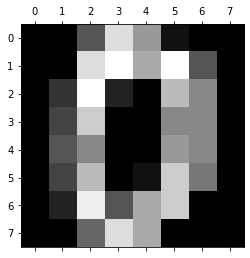

Nombre d'images : 1797
Taille d'une image en pixel <=> Dimension des données d'entrée, D = 64
Classes : [0 1 2 3 4 5 6 7 8 9]
Nombre de classes : 10
Nombre d'éléments par classe :
{0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}


In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.gray()
plt.matshow(digits.images[0]) #index est le numéro de l’image
plt.show()

# Récupération des données et des classes :
X = digits.data # données d'observation
y = digits.target # classes

print("Nombre d'images :",X.shape[0])
print("Taille d'une image en pixel <=> Dimension des données d'entrée, D =",X.shape[1])

def nb_class():
    # dataset is loaded in the variable data
    classes = np.unique(y)
    return classes,len(classes)

c,n=nb_class()
print('Classes :', c)
print('Nombre de classes :', n)

print("Nombre d'éléments par classe :")
unique, counts = np.unique(y,return_counts=True)
print(dict(zip(unique, counts)))

### 2. Séparer une fois pour toutes la base initiale en deux : apprentissage (70%) et test (30%) (`model_selection.train_test_split`).

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1257, 64)
y_train (1257,)
X_test (540, 64)
y_test (540,)


***
# 2. Apprentissage
Définir le réseau :
```py
clf1 = MLPClassifier(hidden_layer_sizes=**C**, activation=’tanh’, solver=’sgd’, batch_size=1, alpha=0, learning_rate=’adaptive’)
```
Entraîner le réseau (fonction `fit`). Optimiser la structure du réseau de neurones (nombre de cellules en couche cachée). Étudier l’influence du nombre de neurones cachés sur les taux de reconnaissance en apprentissage et en généralisation (fonction `score`). Conclure sur l’architecture optimale. Vous pouvez modifier les paramètres en fonction des conclusions tirées au TP2.

nombres de neurones cachés : 5


/home/thomas/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/thomas/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


nombres de neurones cachés : 6
nombres de neurones cachés : 7


/home/thomas/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/thomas/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


nombres de neurones cachés : 8


/home/thomas/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


nombres de neurones cachés : 9


/home/thomas/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


nombres de neurones cachés : 10
nombres de neurones cachés : 11


/home/thomas/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/thomas/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


nombres de neurones cachés : 12
nombres de neurones cachés : 13
nombres de neurones cachés : 14


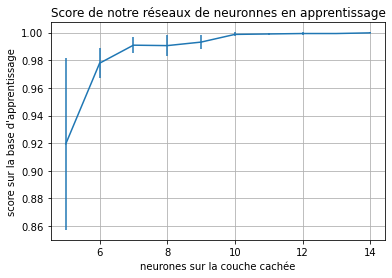

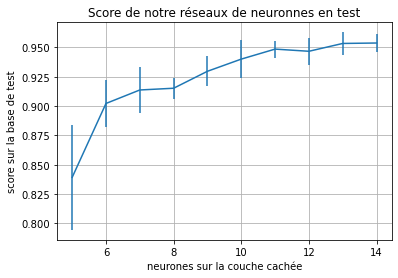

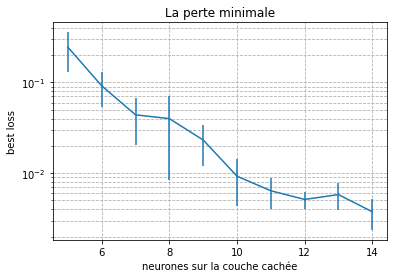

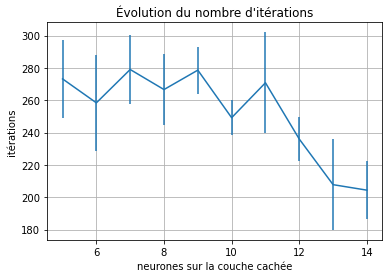

In [5]:
from sklearn.neural_network import MLPClassifier

acc_train = [] # score moyen sur la base d'apprentissage pour chaque couche sur 5 runs
acc_train_std = []
acc_test = [] # score moyen sur la base de test pour chaque couche sur 5 runs
acc_test_std = [] 
best_loss = [] # meilleure coût moyen pour chaque couche sur 5 runs
best_loss_std = []
iterations = [] # nombres d'itérations moyen pour chaque couche sur 5 runs
iterations_std = []
hiden_layer_sizes = []
C = range(5,15) # on veut au minimum une couche cachée
for c in C:
    print("nombres de neurones cachés :",c)
    hiden_layer_sizes.append(c)
    acc_train_runs = []
    acc_test_runs = []
    best_lost_runs = []
    iterations_runs = []
    for i in range(5):
        clf1 = MLPClassifier(hidden_layer_sizes=c, activation='tanh', solver='adam', max_iter=300, batch_size=20, alpha=0,learning_rate='adaptive', verbose = 0)
        clf1.fit(X_train, y_train)
        acc_train_runs.append(clf1.score(X_train, y_train))
        acc_test_runs.append(clf1.score(X_test, y_test))
        best_lost_runs.append(clf1.best_loss_)
        iterations_runs.append(clf1.n_iter_)

    acc_train.append(np.mean(acc_train_runs))
    acc_train_std.append(np.std(acc_train_runs))
    acc_test.append(np.mean(acc_test_runs))
    acc_test_std.append(np.std(acc_test_runs))
    best_loss.append(np.mean(best_lost_runs))
    best_loss_std.append(np.std(best_lost_runs))
    iterations.append(np.mean(iterations_runs))
    iterations_std.append(np.std(iterations_runs))

plt.errorbar(x=hiden_layer_sizes,y=acc_train, yerr=acc_train_std)
plt.grid()
plt.xlabel("neurones sur la couche cachée")
plt.ylabel("score sur la base d'apprentissage")
plt.title("Score de notre réseaux de neuronnes en apprentissage")
plt.show()

plt.errorbar(x=hiden_layer_sizes,y=acc_test, yerr=acc_test_std)
plt.grid()
plt.xlabel("neurones sur la couche cachée")
plt.ylabel("score sur la base de test")
plt.title("Score de notre réseaux de neuronnes en test")
plt.show()

plt.errorbar(x=hiden_layer_sizes,y=best_loss, yerr=best_loss_std)
plt.grid(True,which="both", linestyle='--')
plt.yscale('log')
plt.xlabel("neurones sur la couche cachée")
plt.title("La perte minimale")
plt.ylabel("best loss")
plt.show()

plt.errorbar(x=hiden_layer_sizes,y=iterations, yerr=iterations_std)
plt.grid()
plt.xlabel("neurones sur la couche cachée")
plt.ylabel("itérations")
plt.title("Évolution du nombre d'itérations")
plt.show()

***
# 3. Cross-validation
Afin d’améliorer les performances en généralisation du réseau de neurones, on se propose de mettre en œuvre un apprentissage avec arrêt précoce (*early_stopping*) par cross-validation.

Changer les paramètres du réseau pour séparer la base d’apprentissage précédente en deux sets : apprentissage (80%) et validation croisée (20% : `validation _fraction=0.2`).

Entraîner un réseau de neurones avec arrêt par cross-validation (fonction `fit`). Optimiser le nombre de neurones cachés C : répéter 10 fois l’apprentissage et calculer la moyenne et l’écart-type des taux en apprentissage et en validation afin de minimiser le biais et la variance (fonction `score`). Comparer avec les résultats obtenus précédemment. Conclure.

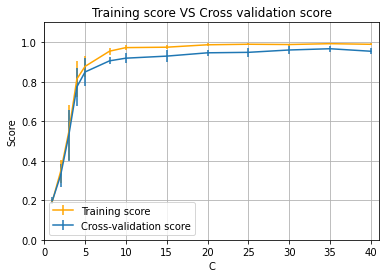

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve

C = np.array([1,2,3,4,5,8,10,15,20,25,30,35,40])

clf = MLPClassifier(activation='tanh', solver='adam', batch_size=1,alpha=0, learning_rate='adaptive',early_stopping=True, validation_fraction=0.2)
train_scores, validation_scores = validation_curve(clf, X_train, y_train, param_name="hidden_layer_sizes",param_range=C,scoring="accuracy", n_jobs=-1, cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.title("Training score VS Cross validation score")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.xlim(0,41)
plt.errorbar(x=C,y=train_scores_mean, yerr=train_scores_std, color="orange", label="Training score")
plt.errorbar(x=C,y=validation_scores_mean, yerr=validation_scores_std, label="Cross-validation score")
plt.grid()
plt.legend(loc="best")
plt.show()

**Conserver** les poids du réseau optimal. Donner la matrice de confusion sur la base de test.

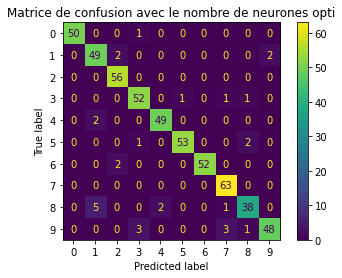

In [7]:
c_star = 10
clf_opti=MLPClassifier(hidden_layer_sizes=c_star,activation='tanh', solver='adam', batch_size=1,alpha=0, learning_rate='adaptive',early_stopping=True, validation_fraction=0.2)
clf_opti.fit(X_train, y_train)
y_pred_test = clf_opti.predict(X_test)
#matrice de confusion
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=clf_opti.classes_)
disp.plot()
plt.title("Matrice de confusion avec le nombre de neurones opti")
plt.show()


Comparer les résultats obtenus avec ceux de l’algorithme des $k$-plus-proches-voisins en termes de taux de reconnaissance et de temps de classification. Régler $k$ sur une base de validation.

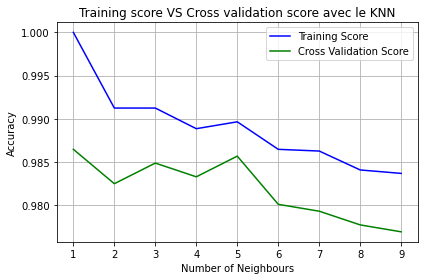

In [11]:
from sklearn.neighbors import KNeighborsClassifier


parameter_range = np.arange(1, 10)
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsClassifier(), X_train, y_train,param_name = "n_neighbors",param_range = parameter_range,cv = 5, scoring = "accuracy")
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,label = "Cross Validation Score", color = 'g')
plt.title("Training score VS Cross validation score avec le KNN")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.grid()
plt.show()

***
# 4. Rejet
On se propose d’améliorer les performances précédentes en autorisant le rejet dans l’étape de décision. On étudiera successivement :
- le rejet de distance : `argmax_reject_threshold`
- le rejet d’ambigüité : `argmax_top2_reject_threshold`

On utilisera la fonction `predict_proba` pour obtenir les probabilités a posteriori des classes.

Faire varier le seuil (threshold) de $0$ à $1$ par pas de $10^{−2}$.

Pour chaque valeur, calculer :
- le taux de rejet (#exemple rejetés/#exemples total)
- le taux de reconnaissance (#exemple bien classés / #exemples classés)

Tracer dans les deux cas la courbe (taux de reconnaissance en fonction du taux de rejet). Choisir la méthode la plus efficace et le seuil associé (meilleur rapport #exemples bien classés / #exemples rejetés).

**Reconnaissance de chiffres mansuscrits par réseau de neurones**
```py
def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))

    return y_masked.filled(-1)

def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))

    return y_masked.filled(-1)
```

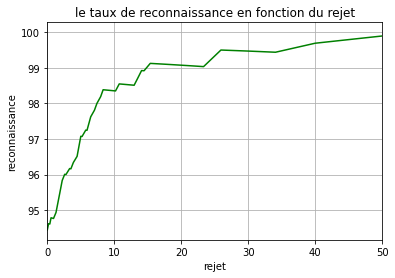

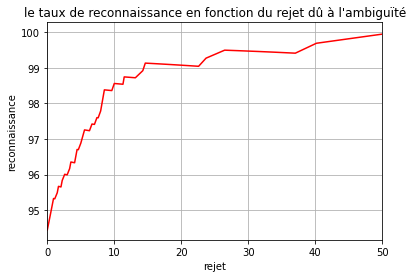

In [16]:
# from sklearn.neural_network import predict_proba

def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))

    return y_masked.filled(-1)

def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))

    return y_masked.filled(-1)



acc_tresh_reject = []
acc_tresh_recognition = []
accTreshRejectAmb = []
accTreshRecognitionAmb = []
y_predict = clf_opti.predict_proba(X_test)

for treshold in np.arange(0,1,0.01):
    # print("treshold: ",treshold)

    y_tresh = argmax_reject_threshold(y_predict, treshold)
    nombre_reject = sum(y_tresh==-1)
    nbClasse = sum(y_tresh!=-1)
    nbBienClasse = sum(y_tresh==y_test)

    yTreshAmb = argmax_top2_reject_threshold(y_predict, treshold)
    nbRejectAmb = sum(yTreshAmb==-1)
    nbClasseAmb = sum(yTreshAmb!=-1)
    nbBienClasseAmb = sum(yTreshAmb==y_test)
    
    taux_reject = (nombre_reject/len(y_predict))*100
    taux_recognition = (nbBienClasse/nbClasse)*100

    tauxRejectAmb = (nbRejectAmb/len(y_predict))*100
    tauxRecognitionAmb = (nbBienClasseAmb/nbClasseAmb)*100
    # print("Taux de rejet : {0:.2f}%".format(taux_reject))
    # print("Taux de reconnaissance : {0:.2f}%".format(taux_recognition))
    # print("taux de rejet :",taux_reject)
    # print("taux de reconnaissance :",taux_recognition)
    acc_tresh_reject.append(taux_reject)
    acc_tresh_recognition.append(taux_recognition)
    accTreshRejectAmb.append(tauxRejectAmb)
    accTreshRecognitionAmb.append(tauxRecognitionAmb)

plt.title("le taux de reconnaissance en fonction du rejet")
plt.xlabel("rejet")
plt.ylabel("reconnaissance")
plt.plot(acc_tresh_reject,acc_tresh_recognition, color = 'g')
plt.xlim(0,50)
plt.grid()
plt.show()

plt.title("le taux de reconnaissance en fonction du rejet dû à l'ambiguïté")
plt.xlabel("rejet")
plt.ylabel("reconnaissance")
plt.plot(accTreshRejectAmb,accTreshRecognitionAmb, color = 'r')
plt.xlim(0,50)
plt.grid()
plt.show()




***
# 5. Cascade de classifieurs
Utiliser l'algorithme des $k$-ppv pour classer les exemples rejetés. Calculer le taux d'erreur global de la cascade de classifieurs constituée de deux étages. Donner les matrices de confusion du 1er étage et de la cascade.
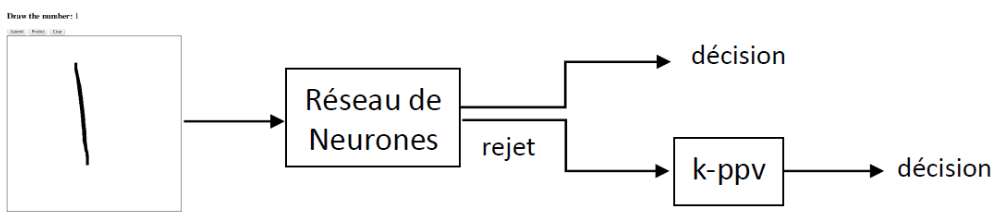

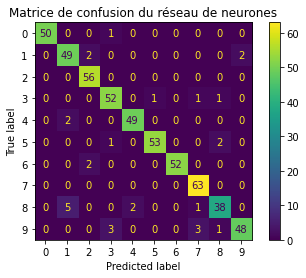

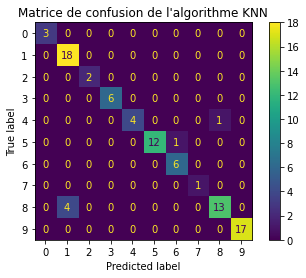

taux d'erreur de la cascade: 1.11%


In [19]:
# 1er étage :
y_predict_clf = clf_opti.predict(X_test)
y_predict_proba = clf_opti.predict_proba(X_test)

#matrice de confusion
first_confusion_matrix = metrics.confusion_matrix(y_test, y_predict_clf)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=first_confusion_matrix,display_labels=clf_opti.classes_)
disp.plot()
plt.title("Matrice de confusion du réseau de neurones")
plt.show()

# Récupération des rejetés :
best_treshold = 0.875
y_tresh = argmax_reject_threshold(y_predict_proba, best_treshold)
X_rejected = X_test[y_tresh == -1]
y_rejected = y_test[y_tresh == -1]

# 2eme étage :
k=5
k_NN = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
k_NN.fit(X_train, y_train)
y_predict_nn = k_NN.predict(X_rejected)

#matrice de confusion
second_confusion_matrix = metrics.confusion_matrix(y_rejected, y_predict_nn)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=second_confusion_matrix,display_labels=k_NN.classes_)
disp.plot()
plt.title("Matrice de confusion de l'algorithme KNN")
plt.show()

# taux d'erreur
matrix_size = 10
nb_errors = 0
for i in range(matrix_size) :
    for j in range(matrix_size) :
        if i!=j :
            nb_errors+=second_confusion_matrix[i][j]

error_rate = (nb_errors/y_test.shape[0])*100
print("taux d'erreur de la cascade: {0:.2f}%".format(error_rate))